TRANSFORMERS/BERT -MODELES PRÉ-ENTRAINÉS CODE GENERATION


ETUDE DE CAS : Prédiction de la qualité du vin <br>
Source : https://archive.ics.uci.edu/dataset/186/wine%2Bquality

CONTEXTE

Le but de cette étude de cas est de prédire la qualité du vin en fonction de ses caractéristiques physico-chimiques. 
Le dataset contient des échantillons de vins avec des attributs tels que l'acidité, le pH, la densité, etc., 
ainsi qu'une note de qualité attribuée par des experts.
Chaque échantillon de vin est évalué sur une échelle de 0 à 10,
où 0 représente une qualité très mauvaise et 10 une qualité excellente.

PROBLÉMATIQUE

Comment prédire la qualité du vin en fonction de ses caractéristiques physico-chimiques ?
Le défi consiste à développer un modèle de machine learning capable de prédire la qualité
du vin à partir de ses attributs.
La qualité du vin est influencée par de nombreux facteurs,
et il est important de comprendre comment ces facteurs interagissent pour affecter la qualité globale.

ANALYSE DESCRIPTIVE

In [4]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Chargement du dataset winequality-red.csv
data = pd.read_csv(r'C:\Users\betthy\Music\UNIVERSITE\MASTER_2_IRT_2024_2025\DEEP LEARNING\Projet\winequality-red.csv', sep=',',encoding='utf-8')

In [10]:
# Aperçu du dataset (affiche les 3 premières lignes)
import pandas as pd
pd.set_option('display.max_columns', 12)  # Affiche jusqu'à 12 colonnes

# Aperçu du dataset (affiche les 5 premières lignes et 12 colonnes)
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


DESCRIPTION DES ATTRIBUTS

1-fixedacidity : Acidité fixe (g de tartre/litre)<br>
2-volatileacidity : Acidité volatile (g de vinaigre/litre)<br>
3-citricacid : Acide citrique (g/litre)<br>
4-residualsugar : Sucre résiduel (g/litre)<br>
5-chlorides : Chlorures (g/litre)<br>
6-freeSulfurDioxide : Dioxyde de soufre libre (mg/litre)<br>
7-totalSulfurDioxide : Dioxyde de soufre total (mg/litre)<br>
8-density : Densité (g/ml)<br>
9-pH : pH<br>
10-sulphates : Sulfates (g/litre)<br>
11-alcohol : Teneur en alcool (%)<br>
12-quality : Qualité (de 0 à 10)<br>

INFORMATION SUR LE DATASET

In [11]:
# Prévisualisation des type de données de notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


EXPLICATION

Notre jeu de données contient 1599 échantillons de vin, chacun décrit par 12 attributs (caractéristiques physico-chimiques et qualité).
Toutes les colonnes sont complètes (aucune valeur manquante), ce qui est idéal pour l’analyse.
La majorité des variables sont de type float64 (valeurs décimales), sauf la colonne quality qui est un entier (int64).
Cela signifie que les données sont prêtes pour une analyse statistique ou la création de modèles de machine learning, sans avoir besoin de traitement préalable pour gérer les valeurs manquantes ou les types de données.
Vous pouvez donc passer à l’analyse descriptive ou à la visualisation des données.


In [12]:
# Affichage des noms de colonnes du dataset
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
# Affichage des statistiques descriptives du dataset
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


STATISTIQUE DESCRIPTIVE

In [ ]:
#satistiques descriptives du dataset
#cette fonction permet d'obtenir un résumé statistique des colonnes numériques du DataFrame
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [42]:
#Nombre de lignes et de colonnes du dataset
print("Nombre de lignes et de colonnes du dataset:", data.shape)

Nombre de lignes et de colonnes du dataset: (1599, 12)


Fréquence des valeurs de la variable cible 'quality':
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


C:\Users\betthy\AppData\Local\Temp\ipykernel_17476\3915763819.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


<Axes: xlabel='quality', ylabel='count'>

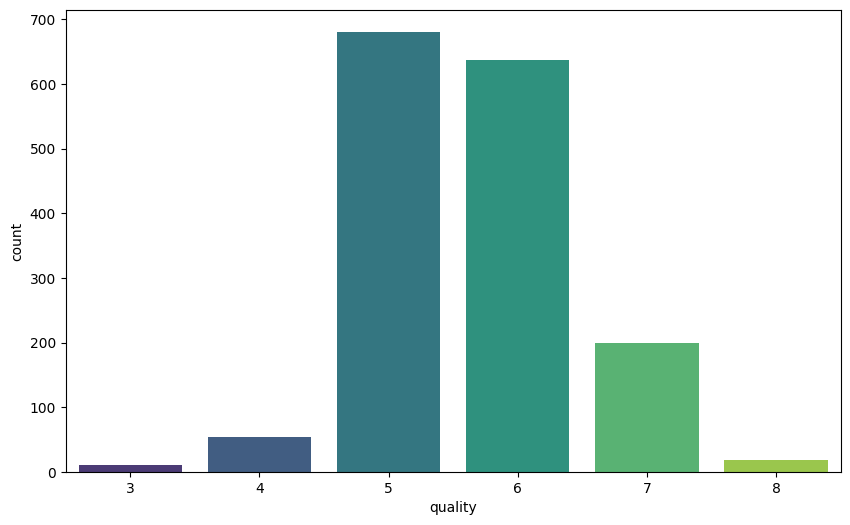

In [50]:
#Frequence des valeurs de la variable cible 'quality'
quality_counts = data['quality'].value_counts()
print("Fréquence des valeurs de la variable cible 'quality':")
print(quality_counts)
# Visualisation de la distribution de la variable cible 'quality'
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, palette='viridis')

ANALYSE DIAGNOSTIQUE

L’analyse diagnostique vise à comprendre les relations entre les différentes caractéristiques physico-chimiques du vin et la variable cible « quality ».
Pour cela, on utilise principalement la matrice de corrélation, qui permet d’identifier les variables les plus fortement liées à la qualité du vin, qu’il s’agisse de corrélations positives ou négatives.
Cette étape met en évidence les facteurs qui influencent le plus la qualité, comme la teneur en alcool, l’acidité volatile ou les sulfates.
Les résultats de cette analyse guident le choix des variables à privilégier lors de la modélisation et permettent de détecter d’éventuelles redondances entre variables.
Enfin, la visualisation des corrélations et des distributions aide à mieux comprendre la structure du jeu de données et à anticiper les performances des futurs modèles prédictifs.

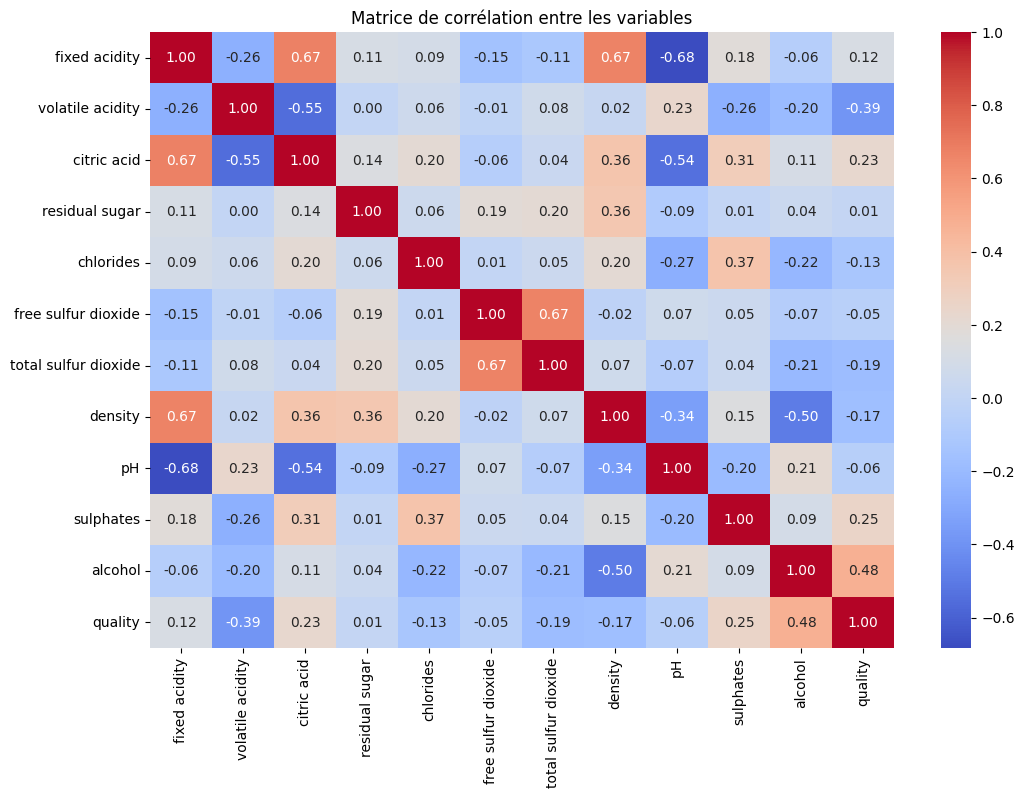

Corrélation de chaque variable avec la qualité du vin :
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [17]:
# Analyse diagnostique : corrélations entre les variables et la qualité
import matplotlib.pyplot as plt
import seaborn as sns

# Matrice de corrélation
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les variables")
plt.show()

# Corrélation avec la variable cible 'quality'
correlations = corr_matrix['quality'].sort_values(ascending=False)
print("Corrélation de chaque variable avec la qualité du vin :")
print(correlations)

OBSERVATION

L’analyse de la matrice de corrélation met en évidence que certaines variables présentent une forte corrélation avec la qualité du vin. Par exemple, la teneur en alcool est positivement corrélée avec la qualité, ce qui signifie que les vins ayant un taux d’alcool plus élevé ont tendance à obtenir de meilleures notes. À l’inverse, l’acidité volatile montre une corrélation négative avec la qualité, indiquant que des niveaux élevés d’acidité volatile sont associés à une qualité inférieure.
D’autres variables, comme les sulfates ou le pH, présentent également des corrélations notables, bien que plus faibles. Certaines variables, telles que la densité ou le sucre résiduel, semblent avoir peu d’influence directe sur la qualité.

Enfin, la matrice de corrélation permet aussi de repérer des redondances entre variables explicatives (par exemple, entre le dioxyde de soufre libre et total), ce qui peut être utile pour éviter la multicolinéarité lors de la modélisation.

En résumé, l’alcool, l’acidité volatile et les sulfates apparaissent comme des facteurs clés à prendre en compte pour prédire la qualité du vin.

In [33]:
prediction_var = ['alcohol', 'sulphates', 'citric acid', 'fixed acidity']

In [25]:
# Données d'apprentissage et test de validation
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3)

print(train.shape)
print(test.shape)

(1119, 12)
(480, 12)


ANALYSE PRÉDICTIVE

In [32]:
# Utilisation des variables corrélées à la qualité du vin
prediction_var = ['alcohol', 'sulphates', 'citric acid', 'fixed acidity']
train_X = train[prediction_var]
test_X = test[prediction_var]

Préparer les textes (colonnes tabulaires => phrase texte)

In [37]:
# Création de la variable cible
train_y = train['quality']
def row_to_text(row):
    return ", ".join([f"{col}: {val}" for col, val in row.items()])

data['text'] = data.drop('quality', axis=1).apply(row_to_text, axis=1)
data['label'] = data['quality'] - data['quality'].min()  # classes 0 à N

Split train/test

In [40]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['text'].tolist(), data['label'].tolist(), test_size=0.2, random_state=42
)

Tokenizer BERT

In [42]:
# Tokenization des textes pour l'entraînement et la validation
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

c:\Users\betthy\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\betthy\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\betthy\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an admi

Dataset torch

In [45]:
# Création des datasets pour PyTorch
import torch
from torch.utils.data import Dataset
class WineDataset(Dataset):

    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = WineDataset(train_encodings, train_labels)
val_dataset = WineDataset(val_encodings, val_labels)

Charger le modèle BERT pour classification multiclasse

In [68]:
from transformers import BertForSequenceClassification

# Ceci téléchargera le modèle dans le cache local de Hugging Face
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [69]:
from transformers import BertForSequenceClassification, BertConfig

local_model_path = r"C:/Users/betthy/Desktop/models/bert-base-uncased"

try:
    # Try to load from local path
    config = BertConfig.from_pretrained(local_model_path, num_labels=3, local_files_only=True)
    model = BertForSequenceClassification.from_pretrained(
        local_model_path,
        config=config,
        local_files_only=True
    )
    print("Modèle chargé avec succès depuis le dossier local")
except OSError as e:
    print("Le modèle local n'a pas été trouvé ou est incomplet. Téléchargement depuis Hugging Face Hub...")
    config = BertConfig.from_pretrained("bert-base-uncased", num_labels=3)
    model = BertForSequenceClassification.from_pretrained(
        "bert-base-uncased",
        config=config
    )
    print("Modèle téléchargé et chargé avec succès")

Le modèle local n'a pas été trouvé ou est incomplet. Téléchargement depuis Hugging Face Hub...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Modèle téléchargé et chargé avec succès


ENTRAINEMENT

In [76]:
# Installer accelerate si nécessaire
%pip install "accelerate>=0.26.0"

# Entraînement du modèle avec les données préparées
from transformers import Trainer, TrainingArguments
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=10,
    do_eval=True,              # déclenche l’évaluation si supportée
    save_strategy="no",        # évite les erreurs si save_strategy est manquant
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

Note: you may need to restart the kernel to use updated packages.


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>=0.26.0'`